# Exercise Classification

## MNIST Data


In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
np.shape(X)

(70000, 784)

### E1.1: split data init train and test sets 
use (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #split 90% train 10% test

### E1.2: normalize data
use (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer(

In [5]:
from sklearn.preprocessing import Normalizer

norm_it = Normalizer(norm='l2')
X_train_norm = norm_it.transform(X_train)
X_test_norm = norm_it.transform(X_test)

### E1.3: plot some data samples 
use (https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

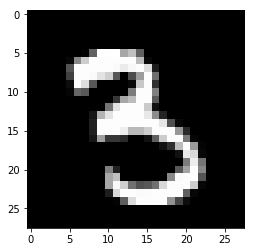

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.reshape(X_test_norm[23,:],(28,28)), cmap='gray') #need to reshape 1D vector to 2D

## Random Forest Classification

### E1.4: train a Random Forest Classifier on the data
use (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_norm, y_train)
#pred = rf.predict_proba(X_test_norm)
pred = rf.predict(X_test_norm)
pred

/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['2', '9', '4', ..., '2', '7', '5'], dtype=object)

### E1.5: evaluate three models with differt number of trees: 10, 100, 500
calculate and compare
* accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
* F-Measure (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)


In [9]:

rf_10 = RandomForestClassifier(n_estimators=10)
rf_10.fit(X_train_norm, y_train)

rf_100 = RandomForestClassifier(n_estimators=100, n_jobs=4)
rf_100.fit(X_train_norm, y_train)

#500 analog

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
pred_10 = rf_10.predict(X_test_norm)
pred_100 = rf_100.predict(X_test_norm)

In [11]:
from sklearn.metrics import accuracy_score
print("10: ",accuracy_score(y_test, pred_10))
print("100: ",accuracy_score(y_test, pred_100))

10:  0.9512857142857143
100:  0.9728571428571429


In [13]:
imp=rf_10.feature_importances_

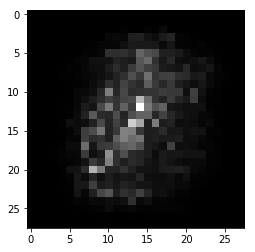

In [14]:
plt.imshow(np.reshape(imp,(28,28)), cmap='gray') #need to reshape 1D vector to 2D

In [18]:
pathts=rf.decision_path(X_test)

In [22]:
?rf.decision_path

Signature: rf.decision_path(X)
Docstring:
Return the decision path in the forest

.. versionadded:: 0.18

Parameters
----------
X : array-like or sparse matrix, shape = [n_samples, n_features]
    The input samples. Internally, its dtype will be converted to
    ``dtype=np.float32``. If a sparse matrix is provided, it will be
    converted into a sparse ``csr_matrix``.

Returns
-------
indicator : sparse csr array, shape = [n_samples, n_nodes]
    Return a node indicator matrix where non zero elements
    indicates that the samples goes through the nodes.

n_nodes_ptr : array of size (n_estimators + 1, )
    The columns from indicator[n_nodes_ptr[i]:n_nodes_ptr[i+1]]
    gives the indicator value for the i-th estimator.
File:      ~/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py
Type:      method
